In [5]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import numpy.random as rand
import pylab as pl
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
from random import seed
from random import gauss
from random import random
from random import uniform

In [ ]:
#Tests with artificially generated tufts#

In [6]:
def create_raw_tuft(x, y):
    seed(100)
    tuft = np.random.uniform(0,0.20,(100, 30))
    for i in range(0, 8):
        for j in range(0, 30):
            tuft[i][j] = uniform(x, y)
            tuft[-i][j] = uniform(x, y)

    for i in range(0, 100):
        for j in range(0, 4):
            tuft[i][j] = uniform(x, y)
            tuft[i][-j] = uniform(x, y)
            
    return tuft



In [7]:
def open_tuft(tuft, deg_of_separation, x, y):
    
    # seed random number generator
    seed(1)
    gaussian_deviation = gauss(0, 0.15)
    border = (93/9)*deg_of_separation + (93/18)*gaussian_deviation
    
    for i in range(int(border), 93):
        for j in range(10, 20):
            tuft[i][j] = uniform(x, y)
            
    return tuft
    

In [41]:
def plot_tuft(tuft):

    plt.imshow(tuft, cmap = "gray", vmin = 0, vmax = 1)
    plt.show()


In [42]:
def plot_9_tufts(tufts):
    
    f, axarr = plt.subplots(5, 2)
    for i in range(0, 9):
            axarr[i%5,i%2].imshow(tufts[i].reshape(100, 30),  cmap = "gray", vmin = 0, vmax = 1)
    
    plt.show()

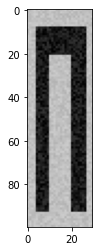

In [43]:
plot_tuft(open_tuft(create_raw_tuft(0.7,0.8), 2, 0.7, 0.8))

In [44]:

def create_n_tufts(n):
    all_tufts = np.zeros((n, 100, 30))
    for i in range(1, n):
        seed(i)
        interval = int(10*random())
        tuft = create_raw_tuft(0.7,0.8)
        tuft = open_tuft(tuft, interval, 0.7, 0.8)
        all_tufts[i] = tuft
    return all_tufts

In [45]:
data = create_n_tufts(1000)
data = data.reshape([1000, 3000])

In [46]:
def train_kmeans(data, k):

        shape = data.shape
        centroids = np.zeros((k, shape[1]))
        seed(1)
        for i in range(k):
            centroids[i] = data[round(random()*shape[0])]

        print('Centroids: ')
        for c in centroids:
            plot_tuft(c.reshape(100, 30))

        count = 0
        while count < 100:
            count += 1
            print('-----------------------------------------------')
            print('Iteration: ', count)

            distances = np.zeros((shape[0], k))
            for ix, i in enumerate(data):
                for ic, c in enumerate(centroids):
                    distances[ix, ic] = np.sum(np.sqrt((i -c)**2))
                    
                    
            labels = np.argmin(distances, axis = 1)
            new_centroids = np.zeros((k, shape[1]))
            
            for centroid in range(k):
                temp = data[labels == centroid]
                for dim in range(shape[1]): 
                    new_centroids[centroid, dim] = np.mean(temp[:,dim])
            
            '''
            for c in new_centroids:
                plot_centroids[i] = c.reshape(100, 30))
            '''
            plot_9_tufts(centroids)
            
            if np.linalg.norm(new_centroids - centroids) < np.finfo(float).eps:
                print("DONE!")
                break

            centroids = new_centroids
            
        return centroids, labels

Centroids: 


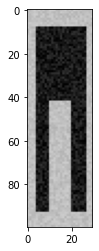

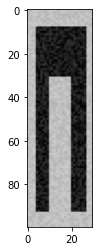

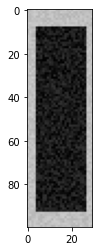

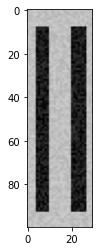

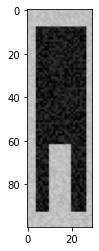

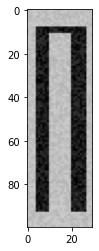

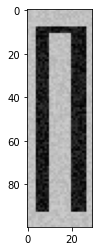

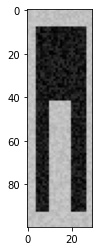

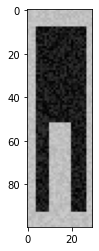

-----------------------------------------------
Iteration:  1


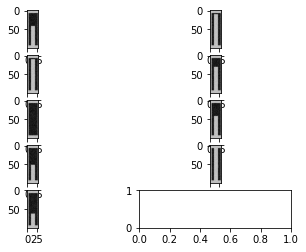

-----------------------------------------------
Iteration:  2


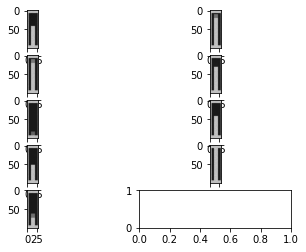

-----------------------------------------------
Iteration:  3


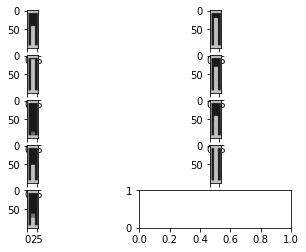

DONE!


In [47]:
centroids, labels = train_kmeans(data, 9)

In [ ]:
def getAverageDistance(centroids, labels, data):

        dists = np.zeros((len(centroids),))
        for ix, centroid in enumerate(centroids):
            temp = data[labels == ix]
            dist = 0
            for i in temp:
                dist += np.linalg.norm(i - centroid)
            dists[ix] = dist/len(temp)
        return dists